<a href="https://colab.research.google.com/github/WagnerLopesCardozo/BioInformatica_Genomica/blob/main/PROJET_Bioinformatica_Sobreviv%C3%AAncia_Paciente_Gen%C3%B4mica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print(data.columns)


Index(['Study ID', 'Patient ID', 'Sample ID', 'Overall Survival (Months)',
       'Overall Survival Status'],
      dtype='object')


In [ ]:
# Suponha que o nome da coluna seja 'Sobrevivencia'
X = data.drop(columns=['Overall Survival Status'])
y = data['Overall Survival Status']


In [ ]:
pip install lifelines


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 10.2 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=b483aa1c7c3179286b17a4056d8a7ac7158df8bdfe78bc1731f508c1b744ee5b
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


Estatísticas de Sobrevivência para o Grupo Sobrevivente:
          removed  observed  censored  entrance  at_risk
event_at                                                
0.0             0         0         0         3        3
1.0             3         3         0         0        3
Probabilidade de Sobrevivência: event_at
0.0    1.0
1.0    0.0
Name: Survived, dtype: float64
Tempo Médio de Sobrevivência: 1.0

Estatísticas de Sobrevivência para o Grupo Não Sobrevivente:
          removed  observed  censored  entrance  at_risk
event_at                                                
0.0             7         7         0         7        7
Probabilidade de Sobrevivência: 0.0
Tempo Médio de Sobrevivência: 0.0


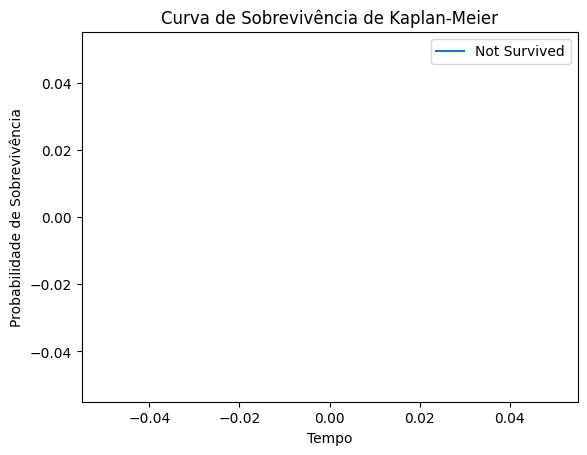

In [ ]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Dados de exemplo
data = pd.DataFrame({
    'Sample ID': ['TCGA-3G-AB0O-01', 'TCGA-3G-AB0Q-01', 'TCGA-3G-AB0T-01', 'TCGA-3G-AB14-01', 'TCGA-3G-AB19-01', 'TCGA-3Q-A9WF-01', 'TCGA-3S-A8YW-01', 'TCGA-3S-AAYX-01', 'TCGA-3T-AA9L-01', 'TCGA-4V-A9QI-01'],
    'Overall Survival Status': [0, 0, 1, 1, 1, 0, 0, 0, 0, 0]
})

# Inicialize o objeto KaplanMeierFitter
kmf = KaplanMeierFitter()

# Divida os dados em grupos (no exemplo, apenas dois grupos de sobreviventes e não sobreviventes)
groups = data['Overall Survival Status']
mask_survived = (groups == 1)
mask_not_survived = (groups == 0)

# Ajuste os dados do grupo sobrevivente
kmf.fit(data.loc[mask_survived, 'Overall Survival Status'], label='Survived')

# Gere as estatísticas de sobrevivência
survival_table = kmf.event_table
survival_probability = kmf.predict(survival_table.index)
median_survival_time = kmf.median_survival_time_

# Imprima as estatísticas de sobrevivência
print("Estatísticas de Sobrevivência para o Grupo Sobrevivente:")
print(survival_table)
print(f"Probabilidade de Sobrevivência: {survival_probability}")
print(f"Tempo Médio de Sobrevivência: {median_survival_time}")

# Ajuste os dados do grupo não sobrevivente
kmf.fit(data.loc[mask_not_survived, 'Overall Survival Status'], label='Not Survived')

# Gere as estatísticas de sobrevivência
survival_table = kmf.event_table
survival_probability = kmf.predict(survival_table.index)
median_survival_time = kmf.median_survival_time_

# Imprima as estatísticas de sobrevivência
print("\nEstatísticas de Sobrevivência para o Grupo Não Sobrevivente:")
print(survival_table)
print(f"Probabilidade de Sobrevivência: {survival_probability}")
print(f"Tempo Médio de Sobrevivência: {median_survival_time}")

# Plote o gráfico de Kaplan-Meier
plt.figure()
kmf.plot()
plt.title("Curva de Sobrevivência de Kaplan-Meier")
plt.xlabel("Tempo")
plt.ylabel("Probabilidade de Sobrevivência")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Gerar dados fictícios (substitua por seus próprios dados)
np.random.seed(0)
n_samples = 100000
n_features = 200
X = np.random.rand(n_samples, n_features)
y = np.random.choice([0, 1], n_samples)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar o modelo da RNA
model = keras.Sequential([
    keras.layers.Input(shape=(n_features,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Avaliar o modelo no conjunto de teste
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Acurácia no conjunto de teste: {accuracy * 100:.2f}%')

# Fazer previsões
predictions = model.predict(X_test)
predicted_labels = (predictions > 0.5).astype(int)

# Exemplo de como classificar um paciente fictício
new_patient = np.random.rand(1, n_features)  # Dados do paciente fictício
new_patient = scaler.transform(new_patient)
prediction = model.predict(new_patient)
if prediction > 0.5:
    print("Paciente classificado como Falecido")
else:
    print("Paciente classificado como Vivendo")


Epoch 1/20
2500/2500 [==============================] - 7s 3ms/step - loss: 0.6991 - accuracy: 0.4991
Epoch 2/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6892 - accuracy: 0.5367
Epoch 3/20
2500/2500 [==============================] - 6s 2ms/step - loss: 0.6813 - accuracy: 0.5621
Epoch 4/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6688 - accuracy: 0.5863
Epoch 5/20
2500/2500 [==============================] - 6s 2ms/step - loss: 0.6541 - accuracy: 0.6087
Epoch 6/20
2500/2500 [==============================] - 6s 2ms/step - loss: 0.6403 - accuracy: 0.6273
Epoch 7/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6274 - accuracy: 0.6437
Epoch 8/20
2500/2500 [==============================] - 6s 3ms/step - loss: 0.6164 - accuracy: 0.6537
Epoch 9/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6076 - accuracy: 0.6630
Epoch 10/20
2500/2500 [==============================] - 6s 3ms/step - loss: 0.598

Epoch 1/100
2500/2500 [==============================] - 15s 6ms/step - loss: 0.7068 - accuracy: 0.5003 - val_loss: 0.7047 - val_accuracy: 0.4961
Epoch 2/100
2500/2500 [==============================] - 13s 5ms/step - loss: 0.6672 - accuracy: 0.5938 - val_loss: 0.7193 - val_accuracy: 0.4985
Epoch 3/100
2500/2500 [==============================] - 13s 5ms/step - loss: 0.5856 - accuracy: 0.6913 - val_loss: 0.7958 - val_accuracy: 0.4987
Epoch 4/100
2500/2500 [==============================] - 13s 5ms/step - loss: 0.4594 - accuracy: 0.7848 - val_loss: 0.9493 - val_accuracy: 0.4936
Epoch 5/100
2500/2500 [==============================] - 13s 5ms/step - loss: 0.3397 - accuracy: 0.8543 - val_loss: 1.1807 - val_accuracy: 0.5007
Epoch 6/100
2500/2500 [==============================] - 13s 5ms/step - loss: 0.2473 - accuracy: 0.8994 - val_loss: 1.4990 - val_accuracy: 0.4965
Epoch 7/100
2500/2500 [==============================] - 14s 6ms/step - loss: 0.1858 - accuracy: 0.9265 - val_loss: 1.7881 -

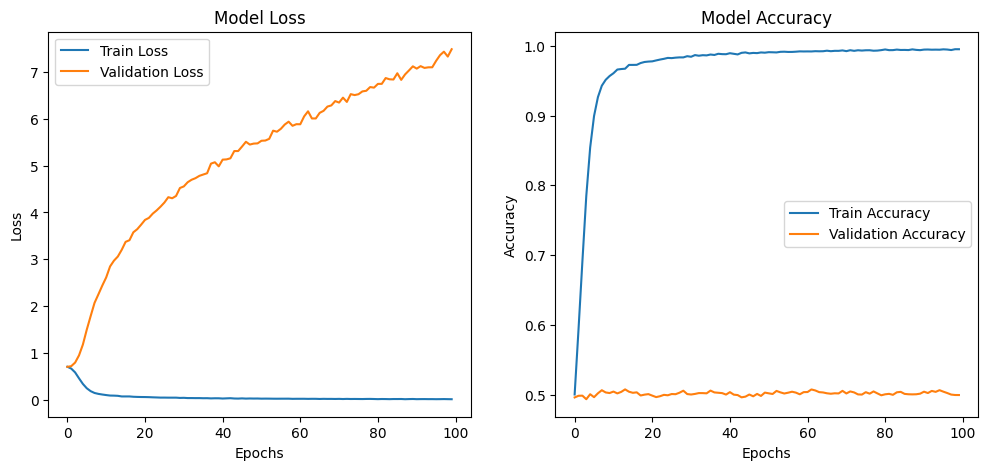

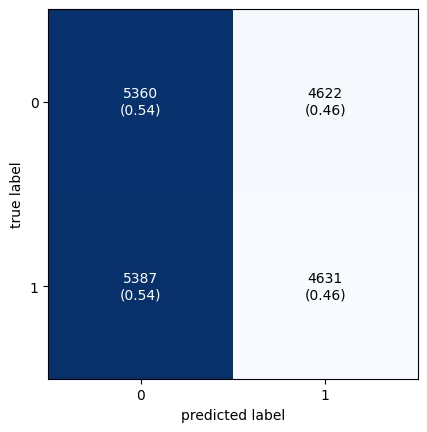

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

# Gerar dados fictícios (substitua por seus próprios dados)
np.random.seed(0)
n_samples = 100000
n_features = 2000
X = np.random.rand(n_samples, n_features)
y = np.random.choice([0, 1], n_samples)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar o modelo da RNA
model = keras.Sequential([
    keras.layers.Input(shape=(n_features,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Avaliar o modelo no conjunto de teste
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Acurácia: {accuracy * 100:.2f}%')
print(f'Acurácia Balanceada: {balanced_accuracy * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print(f'Precisão: {precision * 100:.2f}%')
print(f'Matriz de Confusão:')
print(conf_matrix)

# Plotar gráfico de perda (Model Loss) e gráfico de acurácia (Model Accuracy)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Plotar gráfico da matriz de confusão
plot_confusion_matrix(conf_matrix, show_absolute=True, show_normed=True)
plt.show()
